# 31. Generate a set $S$ of $n$ random bitstrings of length $100$. Find $min_{x,y}\in S: sha1(x||y)$, where $x||y$ denotes concatenation of bitstrings $x$ and $y$. Estimate, what is the maximal $n$ for this task that can be handled by your computer?

In [273]:
import nltk
import numpy as np
from hashlib import sha1
from itertools import combinations
import timeit
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [274]:
np.random.seed(1)
def gen_rand_bit_set(n:int, l:int = 100) -> set:
    """ gen_rand_bit_set generates set of 
        `n` random bitstrings of length `l`.
        
        :param n: number of items in the set
        :type n: Int
        :param l: length of the bitstring
        :type l: int
        
        :rtype: set
    """
    assert l > 0, "Lenght of the string must be > 0."
    n_max = 2**(l)
    n_max = np.iinfo(np.ulonglong).max if n_max > np.iinfo(np.ulonglong).max else n_max
    assert n <= n_max
    bit_strings = set()
    while len(bit_strings) < n:
        x = np.random.randint(n_max, size = 1, dtype=np.ulonglong)
        x_b = f"{{0:0{l}b}}".format(x[0])
        bit_strings.add(x_b)
    
    return bit_strings

In [275]:
def find_min(bin_set:set) -> int:
    """ find_min finds minimum hash value in 
        set `bin_set` computing sha1 for each
        value in this set.
        
        :param bin_set: set of binary strings
        
        :rtype: int
    """
    return min(
        [
            int(sha1((i1+i2).encode()).hexdigest(), 16) 
            for i1, i2 in combinations(bin_set, 2)
        ],
        default = None
    )

In [305]:
with open("result.csv", "w") as f:
    f.write("n,T\n")
    for n in range(0,1500, 100):
        t = timeit.timeit(f"find_min(gen_rand_bit_set({n},100))", number=10, globals=globals())
        f.write(str(n) +","+str(t)+"\n")
    
        # %memit find_min(gen_rand_bit_set({n}, 100))

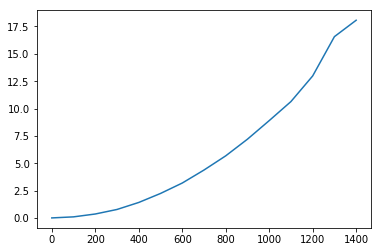

In [310]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

df = pd.read_csv("result.csv")
plt.plot(df["n"],df["T"])

As we see on the graph that this function has quadratic behaviour. This is correct regarding the complexity of comparison each 2 objects. ($O(n^{2})$)
So then if gor 0 is aproximately 0, and for 1000 is around 10[s], then a =  1e-5. In one day (24h - 86 400 s) we can do n around 92951. For a one week (7 days = 604 800s), n is around 245927. One year n ~ 1.7 * 10^6

In [277]:
%memit find_min(gen_rand_bit_set({200}, 100))

peak memory: 183.45 MiB, increment: 0.00 MiB


# 32. (use NLTK). Let $S1, S2, S3$ be the sets of all words shorter than 8 letters from text1,text2, text3, respectively. Compute signatures for $S1, S2, S3$ represented by 100 minhashes and then estimate Jaccard similarity between each pair of $S1, S2, S3$.

In [278]:
from nltk.book import *
from nltk.corpus import stopwords

In [279]:
def get_words(text):
    stop_words = set(stopwords.words("english"))
    return set([w.lower() for w in text if w not in stop_words and len(w) < 8])

In [280]:
t1, t2, t3 = list(map(get_words, [text1, text2, text3]))

In [281]:
def get_permutation(n):
    return np.random.permutation(n)

In [282]:
def generate_idxs(texts):
    arr = []
    for t in texts:
        for w in t:
            if w not in arr:
                arr.append(w)
    return arr

In [283]:
def create_arrays(texts, l=100):
    arr = generate_idxs(texts)
                
    s = np.zeros((len(arr),len(texts)))
    for j in range(len(texts)):
        acc_text = texts[j]
        for i in range(len(arr)):
            if arr[i] in acc_text:
                s[i, j] = 1
    minhashs = np.empty((l, len(texts)), dtype=np.int)
    for i in range(l):
        rand_perm = get_permutation(len(arr))
        for t in range(len(texts)):
            for idx in rand_perm:
                if s[idx, t] == 1:
                    minhashs[i, t] = idx
                    break
    return minhashs

In [284]:
ar = create_arrays([t1,t2,t3])

In [285]:
for c1, c2 in combinations(enumerate([ar[:,0], ar[:,1], ar[:,2]]), 2):
    print("!")
    print(f"Comparison of {c1[0]}, and {c2[0]} texts.")
    match = 0
    for i1, i2 in zip(c1[1],c2[1]):
        if i1 == i2:
            match += 1
    print(match, ar.shape[0], match/ar.shape[0])

!
Comparison of 0, and 1 texts.
29 100 0.29
!
Comparison of 0, and 2 texts.
16 100 0.16
!
Comparison of 1, and 2 texts.
19 100 0.19


# 33. Compare the results from the previous exercise with the exact Jaccard similarity of sets $S1, S2, S3$. What if random permutation of the characteristic matrix rows were replaced with a random mapping?

In [286]:
def jaccard_sim(s1, s2):
    assert s1 or s2 , "One of the set must contain elements"
    return (len(set(s1) & set(s2)) / len(set(s1) | set(s2)) )

In [287]:
for c1,c2 in combinations(enumerate([t1,t2,t3]), 2):
    print(f"exact JS on {c1[0]}, {c2[0]}")
    print(jaccard_sim(c1[1], c2[1]))

exact JS on 0, 1
0.26869367138754086
exact JS on 0, 2
0.1313181367690783
exact JS on 1, 2
0.19528322680185145
